In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns#EDA


from sklearn.model_selection import train_test_split #train test split
from sklearn.ensemble import RandomForestClassifier #model training




In [2]:
df=pd.read_csv(r"E:\myproject\deployment1\train_u6lujuX_CVtuZ9i.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.describe() #by default integerand float columns shown

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df['ApplicantIncome']

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

In [9]:
df[['ApplicantIncome','LoanAmount']]

,ApplicantIncome,LoanAmount
0,5849,NaN
1,4583,128.0
2,3000,66.0
3,2583,120.0
4,6000,141.0
...,...,...
609,2900,71.0
610,4106,40.0
611,8072,253.0
612,7583,187.0


In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
#Data Preprocessing
#1.handling missing values
# handling numerical missing values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())



In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#handling categorical missing data
df['Gender'].mode()[0]

'Male'

In [16]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

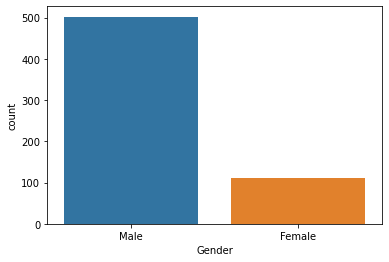

In [18]:
#Exploratory data analysis

#categorical data

sns.countplot(data=df, x='Gender')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

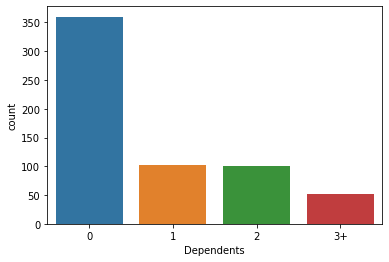

In [19]:
sns.countplot(x='Dependents', data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

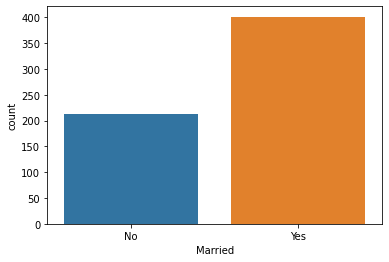

In [20]:
sns.countplot(x='Married',data=df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


C:\Users\arsha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

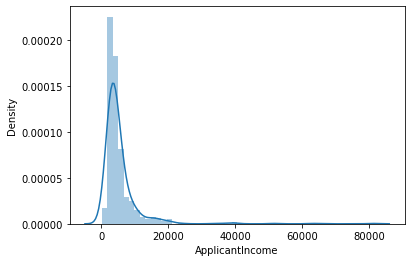

In [22]:
#numerical data
sns.distplot(df.ApplicantIncome)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

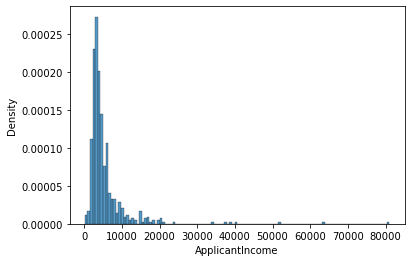

In [23]:
sns.histplot(data=df, x='ApplicantIncome',stat='density')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

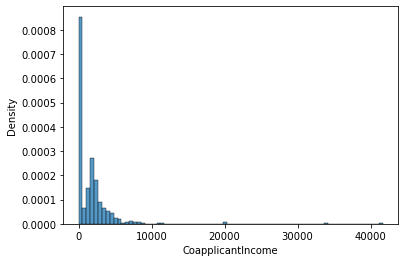

In [24]:
sns.histplot(data=df, x='CoapplicantIncome',stat='density')

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

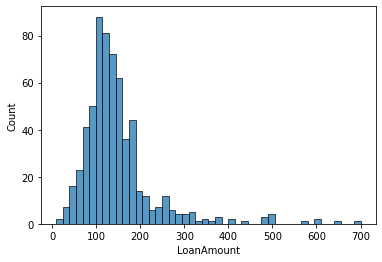

In [25]:
sns.histplot(df.LoanAmount)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

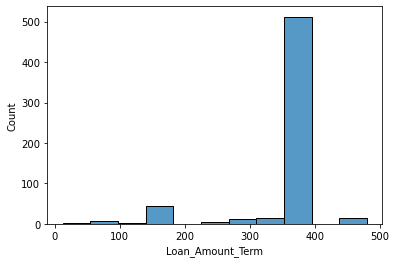

In [26]:
sns.histplot(df.Loan_Amount_Term)


<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

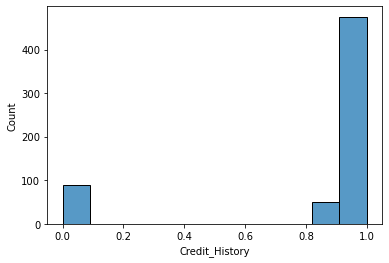

In [27]:
sns.histplot(df.Credit_History)


In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [29]:
#created new column
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [31]:
#data transformation
df['ApplicantIncomelog']=np.log(df['ApplicantIncome'])

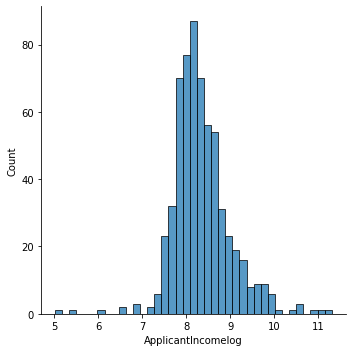

In [32]:
sns.displot(df.ApplicantIncomelog)

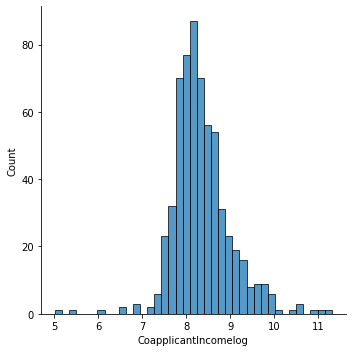

In [33]:
df['CoapplicantIncomelog']=np.log(df['ApplicantIncome'])
sns.displot(df.CoapplicantIncomelog)

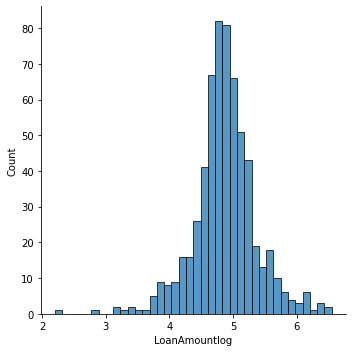

In [34]:
df['LoanAmountlog']=np.log(df['LoanAmount'])
sns.displot(df.LoanAmountlog)


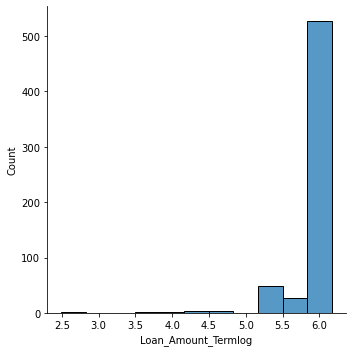

In [35]:
df['Loan_Amount_Termlog']=np.log(df['Loan_Amount_Term'])
sns.displot(df.Loan_Amount_Termlog)

C:\Users\arsha\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


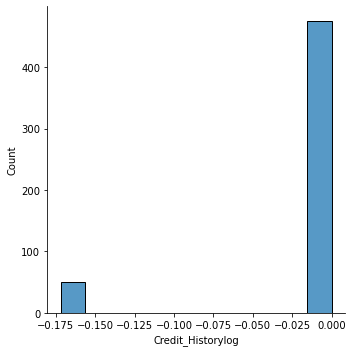

In [36]:
df['Credit_Historylog']=np.log(df['Credit_History'])
sns.displot(df.Credit_Historylog)

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Credit_Historylog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,8.674026,4.986426,5.886104,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,8.430109,4.852030,5.886104,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,8.006368,4.189655,5.886104,0.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.856707,4.787492,5.886104,0.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,8.699515,4.948760,5.886104,0.0


In [38]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'ApplicantIncomelog', 'CoapplicantIncomelog',
       'LoanAmountlog', 'Loan_Amount_Termlog', 'Credit_Historylog'],
      dtype='object')

In [39]:
cols=['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term','Total_Income']

In [40]:
df=df.drop(columns=cols,axis=1)

In [41]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Credit_Historylog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,8.674026,4.986426,5.886104,0.0
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,8.430109,4.852030,5.886104,0.0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,8.006368,4.189655,5.886104,0.0
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,7.856707,4.787492,5.886104,0.0
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,8.699515,4.948760,5.886104,0.0


In [42]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [43]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [44]:
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [45]:
df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [46]:
#handling categorical data - onehot encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    object 
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    object 
 7   Loan_Status           614 non-null    object 
 8   ApplicantIncomelog    614 non-null    float64
 9   CoapplicantIncomelog  614 non-null    float64
 10  LoanAmountlog         614 non-null    float64
 11  Loan_Amount_Termlog   614 non-null    float64
 12  Credit_Historylog     614 non-null    float64
dtypes: float64(6), object(7)
memory usage: 62.5+ KB


In [47]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'ApplicantIncomelog',
       'CoapplicantIncomelog', 'LoanAmountlog', 'Loan_Amount_Termlog',
       'Credit_Historylog'],
      dtype='object')

In [48]:
Gender1 = pd.get_dummies(df['Gender'], drop_first= True)
Married1 = pd.get_dummies(df['Married'], drop_first= True)
Education1 = pd.get_dummies(df['Education'], drop_first= True)
Self_Employed1 = pd.get_dummies(df['Self_Employed'], drop_first= True)
Property_Area1 = pd.get_dummies(df['Property_Area'], drop_first= True)
Loan_Status1 = pd.get_dummies(df['Loan_Status'], drop_first= True)
Dependents1 = pd.get_dummies(df['Dependents'], drop_first= True)

df1 = pd.concat([df, Gender1, Married1, Education1, Self_Employed1, Property_Area1, Loan_Status1, Dependents1], axis = 1)
df=df1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
df = df.drop(columns=cols, axis=1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Credit_History        614 non-null    float64
 1   Loan_Status           614 non-null    object 
 2   ApplicantIncomelog    614 non-null    float64
 3   CoapplicantIncomelog  614 non-null    float64
 4   LoanAmountlog         614 non-null    float64
 5   Loan_Amount_Termlog   614 non-null    float64
 6   Credit_Historylog     614 non-null    float64
 7   Male                  614 non-null    uint8  
 8   Yes                   614 non-null    uint8  
 9   Not Graduate          614 non-null    uint8  
 10  Yes                   614 non-null    uint8  
 11  Semiurban             614 non-null    uint8  
 12  Urban                 614 non-null    uint8  
 13  Y                     614 non-null    uint8  
 14  1                     614 non-null    uint8  
 15  2                     6

In [50]:
df.describe()

,Credit_History,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Credit_Historylog,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y,1,2,3+
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.0,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.842199,8.341213,8.341213,4.862066,5.802065,-inf,0.817590,0.653094,0.218241,0.133550,0.379479,0.328990,0.687296,0.166124,0.164495,0.083062
std,0.349681,0.645263,0.645263,0.496575,0.312482,NaN,0.386497,0.476373,0.413389,0.340446,0.485653,0.470229,0.463973,0.372495,0.371027,0.276201
min,0.000000,5.010635,5.010635,2.197225,2.484907,-inf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.964677,7.964677,4.607658,5.886104,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8.246040,8.246040,4.859812,5.886104,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,8.664750,8.664750,5.104426,5.886104,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,11.302204,11.302204,6.551080,6.173786,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
#test dataset

test = pd.read_csv(r"E:\myproject\deployment1\test_Y3wMUE5_7gLdaTN.csv")
# filling numerical missing data
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mean())

# filling categorical missing data
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

test['Total_income'] = test['ApplicantIncome']+test['CoapplicantIncome']

# apply log transformation to the attribute
test['ApplicantIncomelog'] = np.log(test['ApplicantIncome'])

test['CoapplicantIncomelog'] = np.log(test['CoapplicantIncome'])

test['LoanAmountlog'] = np.log(test['LoanAmount'])

test['Loan_Amount_Termlog'] = np.log(test['Loan_Amount_Term'])

test['Total_Incomelog'] = np.log(test['Total_income'])

cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomelog']
test = test.drop(columns=cols, axis=1)

t1 = pd.get_dummies(test['Gender'], drop_first= True)
t2 = pd.get_dummies(test['Married'], drop_first= True)
t3 = pd.get_dummies(test['Dependents'], drop_first= True)
t4 = pd.get_dummies(test['Education'], drop_first= True)
t5 = pd.get_dummies(test['Self_Employed'], drop_first= True)
t6 = pd.get_dummies(test['Property_Area'], drop_first= True)



df1 = pd.concat([test, t1, t2, t3, t4, t5, t6], axis = 1)
test=df1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
test = test.drop(columns=cols, axis=1)

C:\Users\arsha\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\arsha\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [52]:
test.head()

,Credit_History,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Total_Incomelog,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.000000,8.651724,4.700480,5.886104,8.651724,1,1,0,0,0,0,0,0,1
1,1.000000,8.031385,4.836282,5.886104,8.428581,1,1,1,0,0,0,0,0,1
2,1.000000,8.517193,5.337538,5.886104,8.824678,1,1,0,1,0,0,0,0,1
3,0.825444,7.757906,4.605170,5.886104,8.494129,1,1,0,1,0,0,0,0,1
4,1.000000,8.094378,4.356709,5.886104,8.094378,1,0,0,0,0,1,0,0,1


In [53]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [54]:
##train test split

# specify input and output attributes
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [55]:
x

,Credit_History,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Credit_Historylog,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y,1,2,3+
0,1.0,8.674026,8.674026,4.986426,5.886104,0.0,1,0,0,0,0,1,1,0,0,0
1,1.0,8.430109,8.430109,4.852030,5.886104,0.0,1,1,0,0,0,0,0,1,0,0
2,1.0,8.006368,8.006368,4.189655,5.886104,0.0,1,1,0,1,0,1,1,0,0,0
3,1.0,7.856707,7.856707,4.787492,5.886104,0.0,1,1,1,0,0,1,1,0,0,0
4,1.0,8.699515,8.699515,4.948760,5.886104,0.0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,7.972466,7.972466,4.262680,5.886104,0.0,0,0,0,0,0,0,1,0,0,0
610,1.0,8.320205,8.320205,3.688879,5.192957,0.0,1,1,0,0,0,0,1,0,0,1
611,1.0,8.996157,8.996157,5.533389,5.886104,0.0,1,1,0,0,0,1,1,1,0,0
612,1.0,8.933664,8.933664,5.231109,5.886104,0.0,1,1,0,0,0,1,1,0,1,0


In [56]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [58]:
x_train.head()

,Credit_History,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Credit_Historylog,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y,1,2,3+
92,1.0,8.093462,8.093462,4.394449,5.886104,0.0,1,1,1,0,0,1,1,0,1,0
304,1.0,8.294050,8.294050,4.941642,5.886104,0.0,1,0,0,0,0,0,1,0,0,0
68,1.0,8.867850,8.867850,4.828314,4.094345,0.0,1,1,1,1,0,1,1,0,0,1
15,1.0,8.507143,8.507143,4.828314,5.886104,0.0,1,0,0,0,0,1,1,0,0,0
211,0.0,8.140316,8.140316,4.852030,5.886104,NaN,1,1,0,0,1,0,0,0,0,1


In [59]:
y_test.head()

350    Y
377    Y
163    Y
609    Y
132    Y
Name: Loan_Status, dtype: object

In [60]:
#x_test= x_test.fillna(x_train.mean(), inplace=True)
#x_train= x_test.fillna(x_train.mean(), inplace=True)

In [61]:
#model building and training

#Random forest classifier
model=RandomForestClassifier()

model.fit(x_train, y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').